Title
# 🤖 Model Training: Calories Burnt Prediction
This notebook trains multiple regression models to predict calories burnt during workouts using physiological and exercise data.


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


In [12]:
df = pd.read_csv('C:/Users/OS/Desktop/calories-burnt-prediction-ML/data/calories.csv')
df.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [13]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0
df.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [14]:
X = df.drop(['Calories', 'User_ID'], axis=1)
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((12000, 7), (3000, 7))

In [15]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    return mae, rmse, r2


In [16]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    mae, rmse, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
    print(f"{name}: MAE={mae:.2f}, RMSE={rmse:.2f}, R2={r2:.3f}")


Linear Regression: MAE=8.44, RMSE=11.49, R2=0.967
Ridge Regression: MAE=8.44, RMSE=11.49, R2=0.967
Lasso Regression: MAE=8.44, RMSE=11.49, R2=0.967
Random Forest: MAE=1.72, RMSE=2.68, R2=0.998
XGBoost: MAE=1.50, RMSE=2.14, R2=0.999


,MAE,RMSE,R2
Linear Regression,8.441514,11.488940,0.967294
Ridge Regression,8.441412,11.488962,0.967294
Lasso Regression,8.440238,11.488927,0.967294
Random Forest,1.717313,2.683382,0.998216
XGBoost,1.498120,2.137512,0.998868


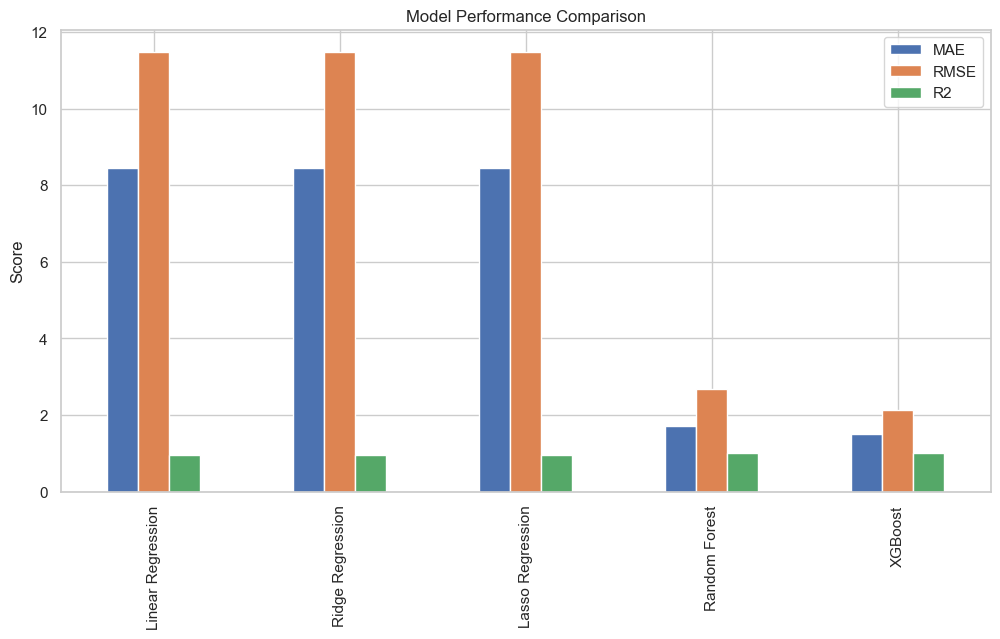

In [17]:
results_df = pd.DataFrame(results).T
display(results_df)
results_df.plot(kind='bar', figsize=(12,6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()


In [19]:
import joblib
best_model = XGBRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
joblib.dump(best_model, 'C:/Users/OS/Desktop/calories-burnt-prediction-ML/models/calories_model.pkl')
print('Model saved to models/calories_model.pkl')


Model saved to models/calories_model.pkl
